In [2]:
import pandas as pd
import numpy as np

time: 20.9 s (started: 2022-12-10 12:53:17 +05:30)


In [3]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-12-10 12:53:44 +05:30)


In [4]:
data_given = pd.read_csv('LAB7ML.csv')

time: 313 ms (started: 2022-12-10 12:53:45 +05:30)


In [5]:
data_given

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


time: 328 ms (started: 2022-12-10 12:53:46 +05:30)


In [7]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-12-10 12:53:55 +05:30)


In [8]:
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

time: 37.6 s (started: 2022-12-10 12:53:57 +05:30)


In [10]:
#prior probability
prob = []
count = data_given['buys_computer'].count()
class_count = list(data_given['buys_computer'].value_counts())
for i in class_count:
  prob.append(i/count)
print(prob)

[0.6428571428571429, 0.35714285714285715]
time: 110 ms (started: 2022-12-10 13:02:00 +05:30)


In [12]:
#class conditional densities
class_conditional_yes = []
class_conditional_no = []
yes_dataset = data_given[data_given['buys_computer']=='yes']
no_dataset = data_given[data_given['buys_computer']=='no']
for i in yes_dataset.columns:
  class_conditional_yes.append(yes_dataset[i].value_counts()/yes_dataset[i].count())
print('Class Conditional Probabilities for Class YES')
for i in range(len(class_conditional_yes)-1):
  print(class_conditional_yes[i])

print('')

for i in no_dataset.columns:
  class_conditional_no.append(no_dataset[i].value_counts()/no_dataset[i].count())
print('Class Conditional Probabilities for Class NO')
for i in range(len(class_conditional_no)-1):
  print(class_conditional_no[i])

Class Conditional Probabilities for Class YES
31…40    0.444444
>40      0.333333
<=30     0.222222
Name: age, dtype: float64
medium    0.444444
low       0.333333
high      0.222222
Name: income, dtype: float64
yes    0.666667
no     0.333333
Name: student, dtype: float64
fair         0.666667
excellent    0.333333
Name: credit_rating, dtype: float64

Class Conditional Probabilities for Class NO
<=30    0.6
>40     0.4
Name: age, dtype: float64
high      0.4
medium    0.4
low       0.2
Name: income, dtype: float64
no     0.8
yes    0.2
Name: student, dtype: float64
excellent    0.6
fair         0.4
Name: credit_rating, dtype: float64
time: 31 ms (started: 2022-12-10 13:03:44 +05:30)


In [14]:
data_given1 = [[-1,1,0,-1,0],[-1,1,0,1,0],[0,1,0,-1,1],[1,1,0,-1,1],[1,-1,1,-1,1],
            [1,-1,1,1,0],[0,-1,1,1,1],[-1,0,0,-1,0],[-1,-1,1,-1,1],[1,0,1,-1,1],
            [-1,0,1,1,1],[0,0,0,1,1],[0,1,1,-1,1],[1,0,0,1,0]]
data_given1 = pd.DataFrame(data_given1,columns=['age','income','student','credit_rating','buys_computer'])
print(data_given1)

    age  income  student  credit_rating  buys_computer
0    -1       1        0             -1              0
1    -1       1        0              1              0
2     0       1        0             -1              1
3     1       1        0             -1              1
4     1      -1        1             -1              1
5     1      -1        1              1              0
6     0      -1        1              1              1
7    -1       0        0             -1              0
8    -1      -1        1             -1              1
9     1       0        1             -1              1
10   -1       0        1              1              1
11    0       0        0              1              1
12    0       1        1             -1              1
13    1       0        0              1              0
time: 47 ms (started: 2022-12-10 13:06:10 +05:30)


In [15]:
#independence between attributes
def cosine_similarity(a,b):
    return np.dot(a,b) / ((np.dot(a,a) **.5) * (np.dot(b,b) ** .5))

matrix = []
cosine = []
for i in data_given1.columns:
  matrix.append(list(data_given1[i]))
for i in range(len(matrix)-1):
  for j in range(i+1,len(matrix)-1):
    print('Cosine between')
    print(matrix[i])
    print(matrix[j])
    value = cosine_similarity(list(matrix[i]),(list(matrix[j])))
    print('Cosine value: ')
    print(value)
    print('')
    if(value == 1 or value == -1):
      print("Vectors are dependent!")

Cosine between
[-1, -1, 0, 1, 1, 1, 0, -1, -1, 1, -1, 0, 0, 1]
[1, 1, 1, 1, -1, -1, -1, 0, -1, 0, 0, 0, 1, 0]
Cosine value: 
-0.21081851067789195

Cosine between
[-1, -1, 0, 1, 1, 1, 0, -1, -1, 1, -1, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
Cosine value: 
0.11952286093343936

Cosine between
[-1, -1, 0, 1, 1, 1, 0, -1, -1, 1, -1, 0, 0, 1]
[-1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1]
Cosine value: 
0.0

Cosine between
[1, 1, 1, 1, -1, -1, -1, 0, -1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
Cosine value: 
-0.3779644730092272

Cosine between
[1, 1, 1, 1, -1, -1, -1, 0, -1, 0, 0, 0, 1, 0]
[-1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1]
Cosine value: 
-0.2672612419124244

Cosine between
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
[-1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1]
Cosine value: 
-0.10101525445522107

time: 31 ms (started: 2022-12-10 13:22:53 +05:30)


In [17]:
#splitting dataset into train and test
X = data_given1.iloc[:,:-1]
y = data_given1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

time: 235 ms (started: 2022-12-10 13:25:03 +05:30)


In [18]:
#naive-bayes classifier
clf = GaussianNB()
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.6666666666666666
time: 219 ms (started: 2022-12-10 13:25:14 +05:30)


In [20]:
#our dataset
data_given2 = pd.read_csv('PROJECT_VC_SHEET.csv')

time: 78 ms (started: 2022-12-10 13:26:40 +05:30)


In [22]:
data_given2

,S.No,State/UT,2018,2019,2020,Mid-Year Projected Population (in Lakhs) (2020),Rate of Violent Crimes (2020),Chargesheeting Rate (2020),Total violent crime (average),pov rate(people % below the poverty line 2021-2022),literacy(2021),Sex Ratio,HDI,unemployment,Police personnel per lakh of population(Actual),MPI,Polation Density 2021 per km^2
0,1,Andhra Pradesh,8211,7670,6683,526.0,12.7,85.8,7521.3000,12.30,67.00,1045,0.649,6.4833,113.68,0.053,308
1,2,Arunachal Pradesh,622,678,414,15.2,27.2,55.1,571.3333,34.67,65.40,997,0.661,7.6000,830.31,0.115,17
2,3,Assam,29418,28696,25629,347.9,73.7,57.2,27914.3300,31.98,72.20,1012,0.613,2.5666,207.49,0.156,397
3,4,Bihar,44407,45004,51116,1219.0,41.9,81.7,46842.3300,33.74,61.80,1090,0.574,12.8083,76.20,0.265,1102
4,5,Chhattisgarh,8669,7823,8033,292.4,27.5,80.7,8175.0000,39.93,70.30,1015,0.611,3.9166,220.53,0.134,189
5,6,Goa,452,415,316,15.5,20.3,80.4,394.3333,3.76,88.70,1027,0.763,16.7666,511.78,0.015,394
6,7,Gujarat,11358,9453,8337,691.7,12.1,88.6,9716.0000,16.63,78.00,965,0.672,2.0500,122.78,0.084,308
7,8,Haryana,14018,12812,12128,292.1,41.5,59.5,12986.0000,12.30,84.10,926,0.708,28.4475,180.19,0.055,573
8,9,Himachal Pradesh,1861,1833,1817,73.6,24.7,77.4,1837.0000,7.62,82.80,1040,0.725,11.8166,240.52,0.030,123
9,10,Jharkhand,11617,12187,14185,381.2,37.2,82.7,12663.0000,36.96,66.40,1050,0.598,13.8833,172.18,0.202,414


time: 31 ms (started: 2022-12-10 13:27:01 +05:30)


In [23]:
data_given2.describe()

,S.No,2018,2019,2020,Mid-Year Projected Population (in Lakhs) (2020),Rate of Violent Crimes (2020),Chargesheeting Rate (2020),Total violent crime (average),pov rate(people % below the poverty line 2021-2022),literacy(2021),Sex Ratio,HDI,unemployment,Police personnel per lakh of population(Actual),MPI,Polation Density 2021 per km^2
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17.500000,12589.058824,12286.294118,11762.441176,397.670588,26.173529,72.167647,12212.596956,18.285000,77.607059,1022.588235,0.680735,8.738921,371.569706,0.081324,1050.058824
std,9.958246,16127.760621,15259.666894,15326.839438,492.834561,14.024747,18.260069,15504.503058,12.181033,8.837098,61.318403,0.056233,6.497299,321.951370,0.065335,2415.996287
min,1.000000,6.000000,16.000000,5.000000,0.700000,5.600000,16.900000,9.000000,0.710000,61.800000,913.000000,0.574000,1.500000,76.200000,0.003000,17.000000
25%,9.250000,631.000000,674.250000,437.000000,24.200000,16.125000,63.475000,581.583300,9.717500,69.550000,975.000000,0.643000,4.035350,131.622500,0.024500,146.250000
50%,17.500000,7931.500000,7746.500000,7358.000000,292.250000,22.900000,76.300000,7844.150000,15.755000,78.400000,1017.500000,0.683000,7.358300,214.010000,0.062000,315.500000
75%,25.750000,15470.750000,15536.750000,14508.250000,630.250000,31.025000,82.450000,15415.752500,31.102500,85.375000,1049.750000,0.722250,11.706200,553.990000,0.129750,568.500000
max,34.000000,65155.000000,55519.000000,51983.000000,2289.300000,73.700000,100.000000,57552.330000,39.930000,94.000000,1187.000000,0.782000,28.447500,1300.930000,0.265000,11297.000000


time: 281 ms (started: 2022-12-10 13:27:28 +05:30)


In [24]:
#classification based on average violent crimes usage from LAB 3
def explore(row: float):
  if row >= 12212.596956:
    return 'high'
  else:
    return 'low'

appliance = data_given2['Total violent crime (average)'].tolist()
classified_data = []
for i in appliance:
  classified_data.append(explore(i))

data_given2['class']=classified_data
print(data_given2)

    S.No           State/UT   2018   2019   2020  \
0      1     Andhra Pradesh   8211   7670   6683   
1      2  Arunachal Pradesh    622    678    414   
2      3              Assam  29418  28696  25629   
3      4              Bihar  44407  45004  51116   
4      5       Chhattisgarh   8669   7823   8033   
5      6                Goa    452    415    316   
6      7            Gujarat  11358   9453   8337   
7      8            Haryana  14018  12812  12128   
8      9   Himachal Pradesh   1861   1833   1817   
9     10          Jharkhand  11617  12187  14185   
10    11          Karnataka  17616  16445  14616   
11    12             Kerala  13133  12736  10255   
12    13     Madhya Pradesh  27106  24972  23287   
13    14        Maharashtra  45706  44074  39162   
14    15            Manipur    658    673    506   
15    16          Meghalaya    662    678    530   
16    17            Mizoram    161    163    161   
17    18           Nagaland    233    181    123   
18    19    

In [26]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,10))
data_given2[[' Rate of Violent Crimes (2020)','Chargesheeting Rate (2020)','Total violent crime (average)','pov rate(people % below the poverty line 2021-2022)','literacy(2021)','Sex Ratio','HDI','unemployment','Police personnel per lakh of population(Actual)','MPI','Polation Density 2021 per km^2']] = scaler.fit_transform(data_given2[['Rate of Violent Crimes (2020)','Chargesheeting Rate (2020)','Total violent crime (average)','pov rate(people % below the poverty line 2021-2022)','literacy(2021)','Sex Ratio','HDI','unemployment','Police personnel per lakh of population(Actual)','MPI','Polation Density 2021 per km^2']])
data = data_given2
data

,S.No,State/UT,2018,2019,2020,Mid-Year Projected Population (in Lakhs) (2020),Rate of Violent Crimes (2020),Chargesheeting Rate (2020),Total violent crime (average),pov rate(people % below the poverty line 2021-2022),literacy(2021),Sex Ratio,HDI,unemployment,Police personnel per lakh of population(Actual),MPI,Polation Density 2021 per km^2,class,Rate of Violent Crimes (2020)
0,1,Andhra Pradesh,8211,7670,6683,526.0,12.7,8.291215,1.305503,2.955125,1.614907,4.817518,3.605769,1.849262,0.306027,1.908397,0.257979,low,1.042584
1,2,Arunachal Pradesh,622,678,414,15.2,27.2,4.596871,0.097723,8.658848,1.118012,3.065693,4.182692,2.263661,6.157357,4.274809,0.000000,low,3.171806
2,3,Assam,29418,28696,25629,347.9,73.7,4.849579,4.849446,7.972973,3.229814,3.613139,1.875000,0.395807,1.071991,5.839695,0.336879,high,10.000000
3,4,Bihar,44407,45004,51116,1219.0,41.9,7.797834,8.138794,8.421724,0.000000,6.459854,0.000000,4.196419,0.000000,10.000000,0.961879,high,5.330396
4,5,Chhattisgarh,8669,7823,8033,292.4,27.5,7.677497,1.419105,10.000000,2.639752,3.722628,1.778846,0.896781,1.178464,5.000000,0.152482,low,3.215859
5,6,Goa,452,415,316,15.5,20.3,7.641396,0.066964,0.777664,8.354037,4.160584,9.086538,5.665312,3.556539,0.458015,0.334220,low,2.158590
6,7,Gujarat,11358,9453,8337,691.7,12.1,8.628159,1.686903,4.059153,5.031056,1.897810,4.711538,0.204101,0.380329,3.091603,0.257979,low,0.954479
7,8,Haryana,14018,12812,12128,292.1,41.5,5.126354,2.255170,2.955125,6.925466,0.474453,6.442308,10.000000,0.849085,1.984733,0.492908,high,5.271659
8,9,Himachal Pradesh,1861,1833,1817,73.6,24.7,7.280385,0.317674,1.761856,6.521739,4.635036,7.259615,3.828407,1.341683,1.030534,0.093972,low,2.804699
9,10,Jharkhand,11617,12187,14185,381.2,37.2,7.918171,2.199039,9.242733,1.428571,5.000000,1.153846,4.595343,0.783683,7.595420,0.351950,high,4.640235


time: 109 ms (started: 2022-12-10 13:31:38 +05:30)


In [27]:
feature = data.iloc[:, 3:17] #for feature vector

time: 31 ms (started: 2022-12-10 13:34:14 +05:30)


In [29]:
#splitting into test and train
X = feature
y = data_given2['class']
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3)

time: 15 ms (started: 2022-12-10 13:34:47 +05:30)


In [30]:
#Project data classifiers
clf1 = GaussianNB()
clf1.fit(X_train1,y_train1)

GaussianNB()

time: 78 ms (started: 2022-12-10 13:49:42 +05:30)


In [31]:
clf1_train = clf1.score(X_train1,y_train1)
clf1_test = clf1.score(X_test1,y_test1)

time: 140 ms (started: 2022-12-10 13:49:52 +05:30)


In [32]:
#applying SVM classifier
clf2 = svm.SVC()
clf2.fit(X_train1, y_train1)

SVC()

time: 344 ms (started: 2022-12-10 13:50:02 +05:30)


In [33]:
clf2_train = clf2.score(X_train1,y_train1)
clf2_test = clf2.score(X_test1,y_test1)

time: 63 ms (started: 2022-12-10 13:51:32 +05:30)


In [34]:
#kernel function = 'poly'
#applying SVM classifier
clf3 = svm.SVC(kernel='poly')
clf3.fit(X_train1, y_train1)

SVC(kernel='poly')

time: 0 ns (started: 2022-12-10 13:51:45 +05:30)


In [35]:
clf3_train = clf3.score(X_train1,y_train1)
clf3_test = clf3.score(X_test1,y_test1)

time: 16 ms (started: 2022-12-10 13:51:58 +05:30)


In [38]:
#K-NN classifier
clf4 = KNeighborsClassifier(n_neighbors = 3)
clf4.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=3)

time: 16 ms (started: 2022-12-10 13:52:31 +05:30)


In [39]:
clf4_train = clf4.score(X_train1, y_train1)
clf4_test = clf4.score(X_test1, y_test1)

time: 219 ms (started: 2022-12-10 13:52:34 +05:30)


In [40]:
#MLP classifier
clf5 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), random_state=1)
clf5.fit(X_train1, y_train1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), random_state=1,
              solver='lbfgs')

time: 437 ms (started: 2022-12-10 13:54:11 +05:30)


In [41]:
clf5_train = clf5.score(X_train1, y_train1)
clf5_test = clf5.score(X_test1, y_test1)

time: 0 ns (started: 2022-12-10 13:54:27 +05:30)


In [42]:
clf6 = DecisionTreeClassifier()
clf6.fit(X_train1,y_train1)

DecisionTreeClassifier()

time: 93 ms (started: 2022-12-10 13:54:39 +05:30)


In [43]:
clf6_train = clf6.score(X_train1, y_train1)
clf6_test = clf6.score(X_test1,y_test1)

time: 0 ns (started: 2022-12-10 13:54:46 +05:30)


In [44]:
graph = [['Gaussian',clf1_train,clf1_test],
         ['SVC',clf2_train,clf2_test],
         ['SVC-Poly',clf3_train,clf3_test],
         ['KNN',clf4_train,clf4_test],
         ['MLP',clf5_train,clf5_test],
         ['Decision-Tree',clf6_train,clf6_test]]
graph = pd.DataFrame(graph)
print(graph)

               0         1         2
0       Gaussian  0.956522  1.000000
1            SVC  0.913043  1.000000
2       SVC-Poly  0.913043  0.909091
3            KNN  1.000000  1.000000
4            MLP  0.695652  0.636364
5  Decision-Tree  1.000000  1.000000
time: 0 ns (started: 2022-12-10 13:54:58 +05:30)


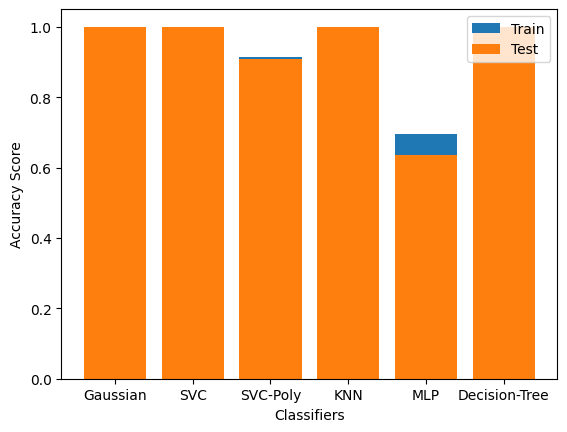

time: 1.02 s (started: 2022-12-10 13:55:10 +05:30)


In [45]:
plt.bar(graph[0], graph[1], label = 'Train')
plt.bar(graph[0], graph[2], label = 'Test')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()